# Diabetes Prediction: Analysis and Model Development

## 1. Introduction

### Purpose
This notebook aims to predict diabetes presence based on behavioral and health indicators, which is a binary classification problem. We'll be using a balanced version of the Behavioral Risk Factor Surveillance System (BRFSS) 2015 dataset from Kaggle.

This dataset is particularly valuable for:
- Public health research and intervention planning
- Early detection of diabetes risk factors
- Analysis of lifestyle and health indicators that contribute to diabetes

### Dataset Information
- **Source**: [Kaggle - Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)
- **Citation**: Centers for Disease Control and Prevention (CDC). Behavioral Risk Factor Surveillance System Survey Data. Atlanta, Georgia: U.S. Department of Health and Human Services, 2015.
- **Problem Type**: Binary Classification (Diabetes: Yes/No)

### Real-World Context
Diabetes affects over 400 million people worldwide and leads to significant healthcare costs and complications including heart disease, kidney failure, and blindness. Early detection and prevention strategies can significantly reduce these impacts.

### Guiding Question
Can we reliably predict diabetes presence using only lifestyle and health indicator data, potentially enabling earlier interventions before clinical symptoms appear?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style and size
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Display all columns
pd.set_option('display.max_columns', None)

# For reproducibility
np.random.seed(42)


In [2]:
# Load the balanced dataset (50-50 split)
df = pd.read_csv('data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# Display the first few rows
print("Sample data:")
df.head()


Sample data:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


## 2. Exploratory Data Analysis (EDA)

In this section, we'll explore the dataset structure, feature distributions, and relationships between variables to gain insights that will inform our modeling approach.


In [3]:
# Data Structure Analysis
print("Dataset shape:", df.shape)
print("\nData types and non-null counts:")
df.info()


Dataset shape: (70692, 22)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth   

In [4]:
# Descriptive statistics
print("Statistical summary of numerical features:")
df.describe().T


Statistical summary of numerical features:


,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


Target variable (Diabetes) distribution:
Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64
Percentage: Diabetes_binary
0.0    50.0
1.0    50.0
Name: count, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_15776\3451756173.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Diabetes_binary', data=df, palette=['#3498db', '#e74c3c'])


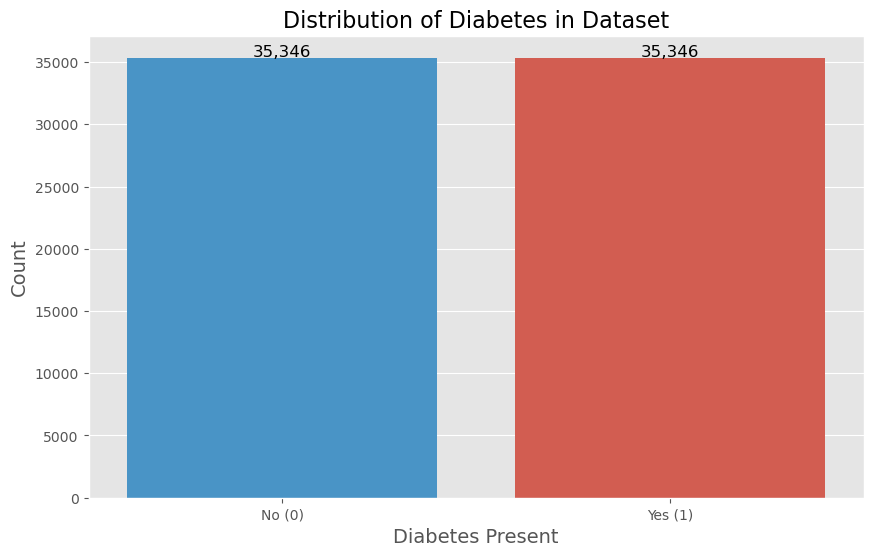

In [5]:
# Target Variable Distribution
print("Target variable (Diabetes) distribution:")
diabetes_counts = df['Diabetes_binary'].value_counts()
print(diabetes_counts)
print(f"Percentage: {100 * diabetes_counts / len(df)}")

# Visualize target distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Diabetes_binary', data=df, palette=['#3498db', '#e74c3c'])
plt.title('Distribution of Diabetes in Dataset', fontsize=16)
plt.xlabel('Diabetes Present', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])

# Add count labels on top of bars
for i, count in enumerate(diabetes_counts.values):
    plt.text(i, count + 100, f'{count:,}', ha='center', fontsize=12)

plt.show()


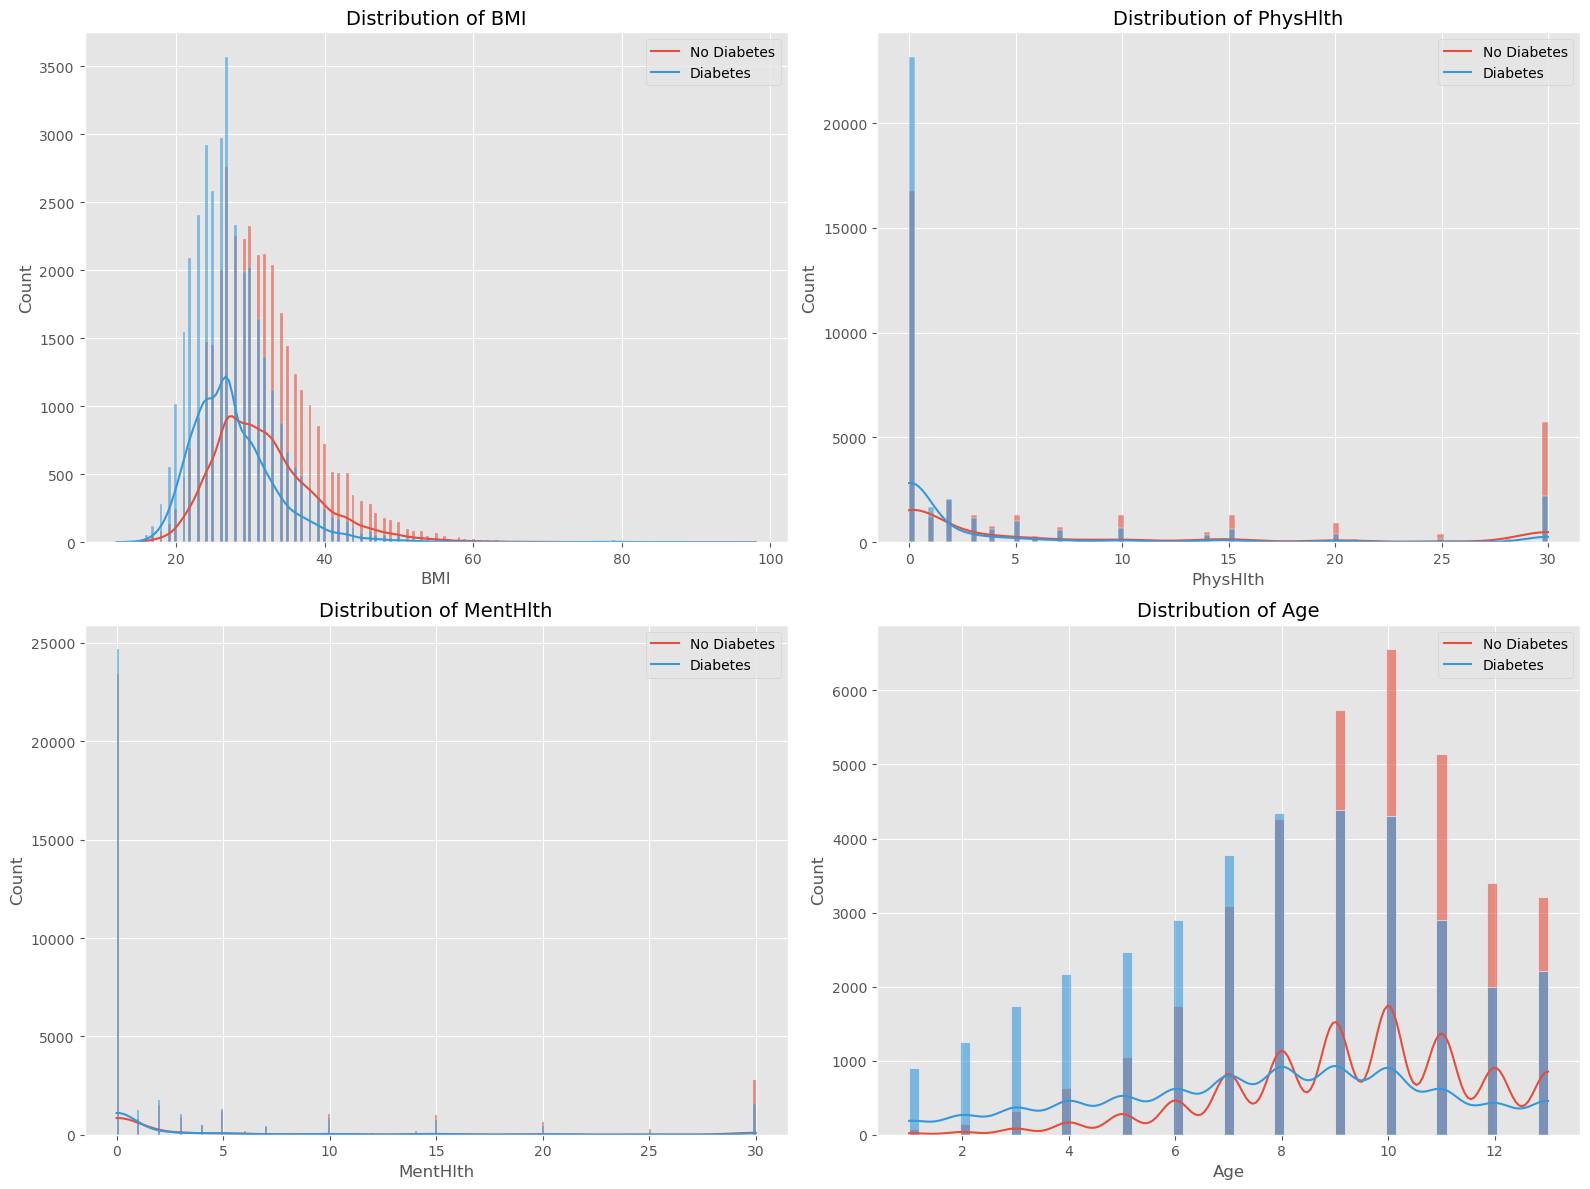


BMI Statistics:
Min BMI: 12.0
Max BMI: 98.0
Zero BMI values: 0
BMI > 50: 923


In [6]:
# Histograms of continuous features
continuous_features = ['BMI', 'PhysHlth', 'MentHlth', 'Age']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(continuous_features):
    # Create histogram with KDE
    sns.histplot(data=df, x=feature, hue='Diabetes_binary', kde=True, 
                 palette=['#3498db', '#e74c3c'], alpha=0.6, ax=axes[i])
    
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].legend(['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()

# Check for outliers or zero values in BMI
print("\nBMI Statistics:")
print(f"Min BMI: {df['BMI'].min()}")
print(f"Max BMI: {df['BMI'].max()}")
print(f"Zero BMI values: {(df['BMI'] == 0).sum()}")
print(f"BMI > 50: {(df['BMI'] > 50).sum()}")


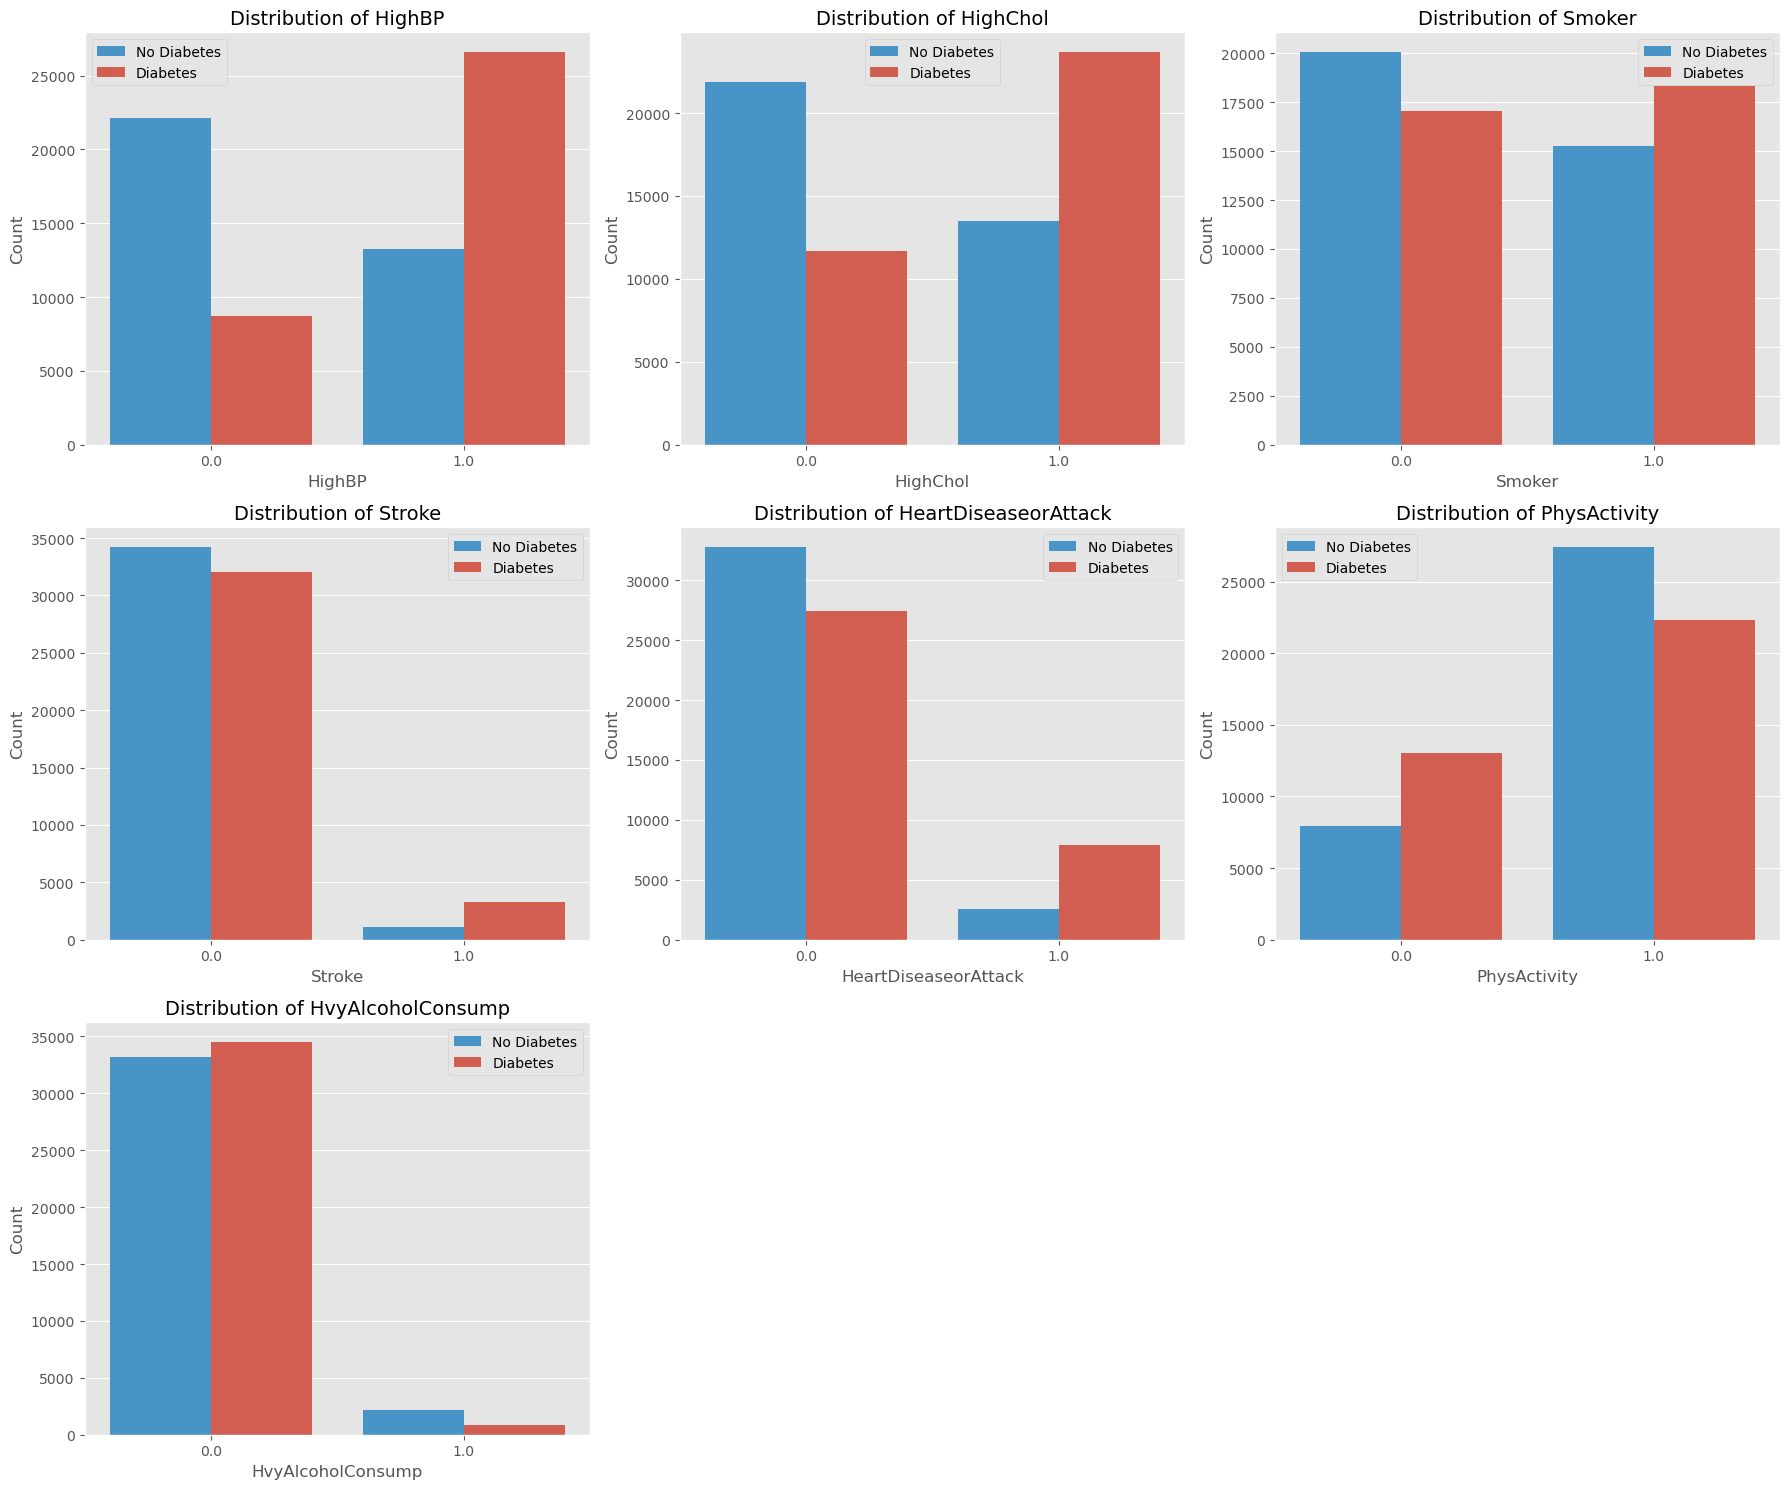

In [7]:
# Count plots for categorical features
categorical_features = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 
                       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    if i < len(axes):
        # Create count plot
        sns.countplot(x=feature, hue='Diabetes_binary', data=df, 
                     palette=['#3498db', '#e74c3c'], ax=axes[i])
        
        axes[i].set_title(f'Distribution of {feature}', fontsize=14)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Count', fontsize=12)
        axes[i].legend(['No Diabetes', 'Diabetes'])

# Hide empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


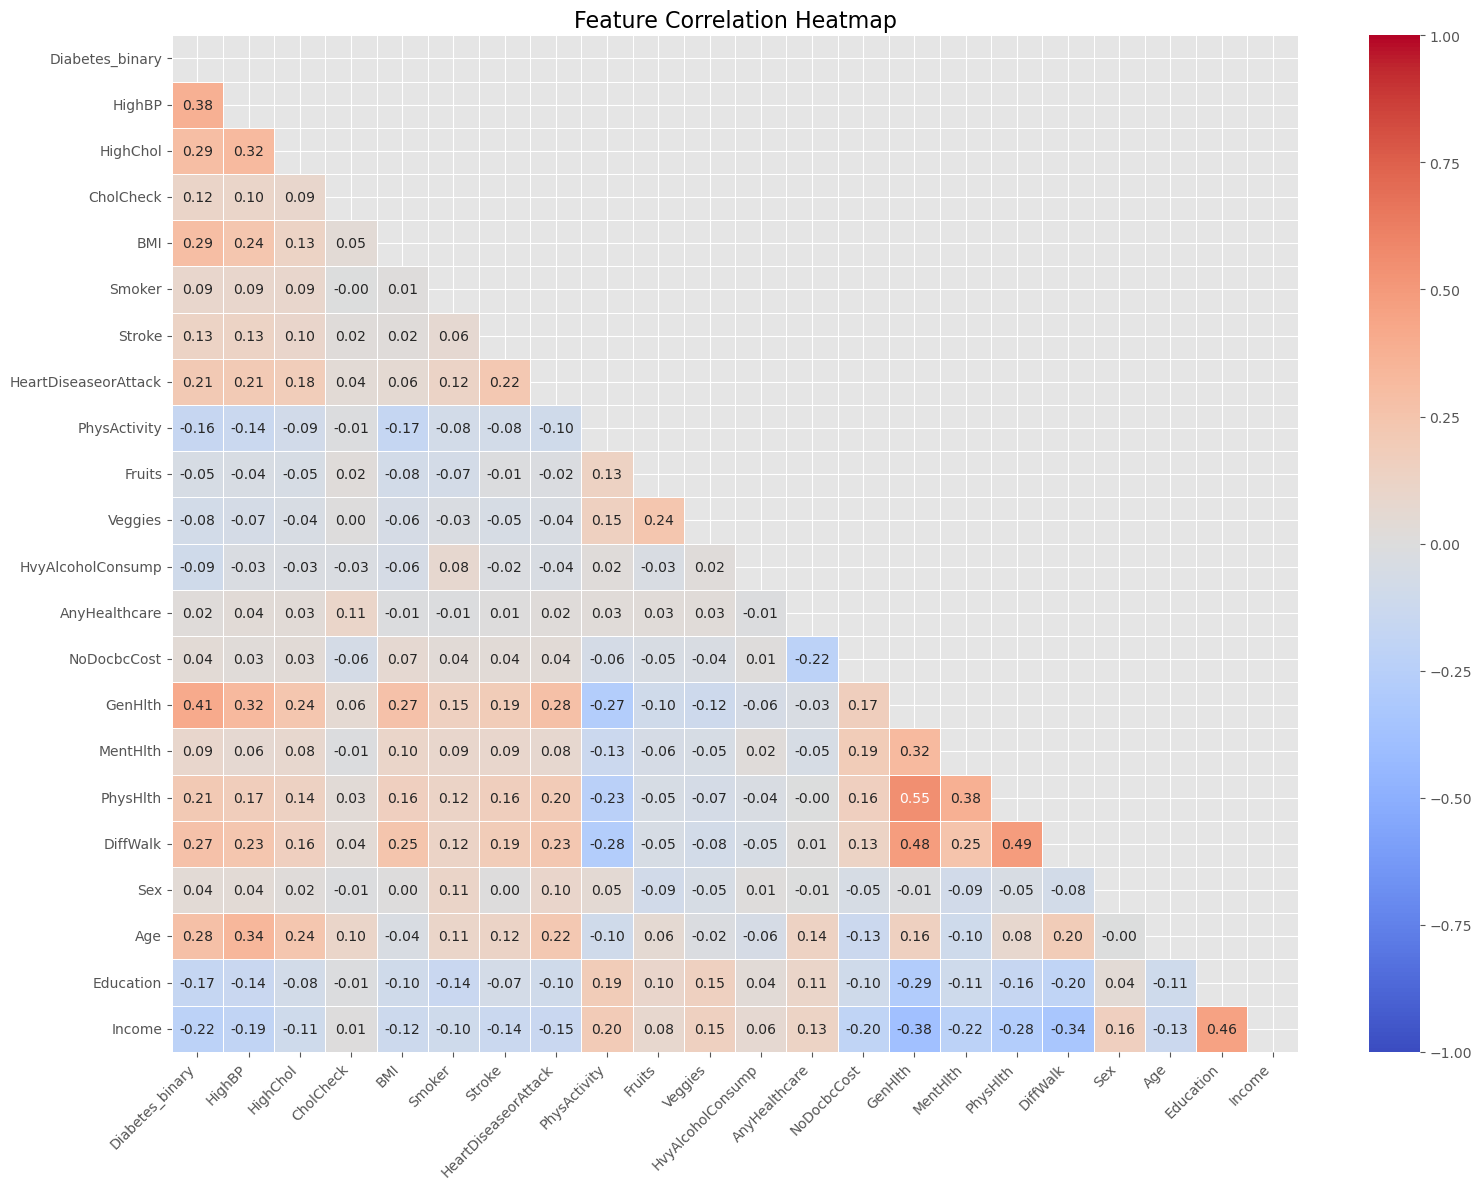

Features most correlated with Diabetes:
Income                 -0.224449
Education              -0.170481
PhysActivity           -0.158666
HvyAlcoholConsump      -0.094853
Veggies                -0.079293
Fruits                 -0.054077
AnyHealthcare           0.023191
NoDocbcCost             0.040977
Sex                     0.044413
Smoker                  0.085999
MentHlth                0.087029
CholCheck               0.115382
Stroke                  0.125427
HeartDiseaseorAttack    0.211523
PhysHlth                0.213081
DiffWalk                0.272646
Age                     0.278738
HighChol                0.289213
BMI                     0.293373
HighBP                  0.381516
GenHlth                 0.407612
Diabetes_binary         1.000000
Name: Diabetes_binary, dtype: float64


In [11]:
# Correlation Analysis
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
mask = np.triu(correlation_matrix)

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            mask=mask, linewidths=0.5, vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Find features most correlated with diabetes
print("Features most correlated with Diabetes:")
diabetes_corr = correlation_matrix['Diabetes_binary'].sort_values(ascending=True)
print(diabetes_corr)


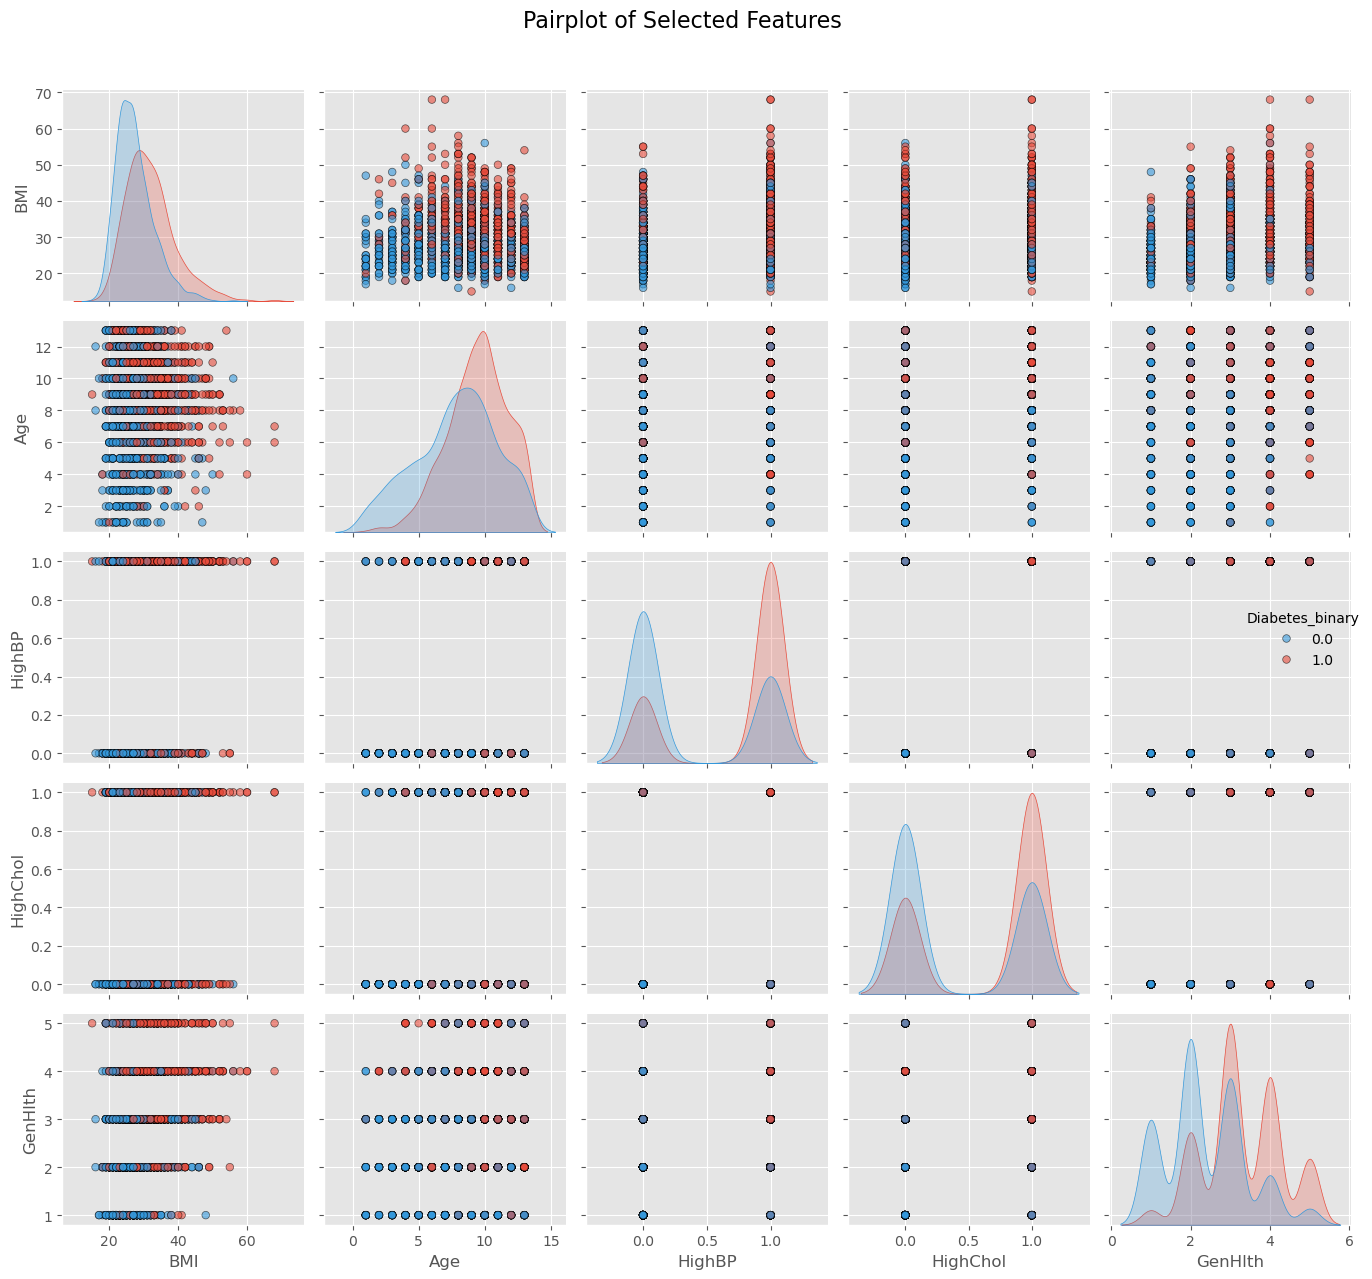

In [16]:
# Pairplot for selected features
# Select a subset of important features based on correlation or domain knowledge
selected_features = ['BMI', 'Age', 'HighBP', 'HighChol', 'GenHlth', 'Diabetes_binary']

# Create a sample for faster plotting (if dataset is large)
sample_size = min(2000, len(df))
df_sample = df.sample(sample_size, random_state=42)

# Create pairplot
sns.pairplot(df_sample[selected_features], hue='Diabetes_binary', 
             palette=['#3498db', '#e74c3c'], diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'k', 'linewidth': 0.5})

plt.suptitle('Pairplot of Selected Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()



## Key Findings

### Target Distribution
- The dataset is perfectly balanced with 35,346 cases (50%) for each class:
  - Diabetes (1): 35,346 records
  - No Diabetes (0): 35,346 records

### Continuous Variables Analysis

**BMI (Body Mass Index)**:
- Range: 12.0 to 98.0
- No zero values detected
- 923 records with BMI > 50 (potential outliers)
- Clear pattern showing higher BMI values more common in diabetes patients

**Age**:
- Strong positive correlation with diabetes (0.28)
- Distribution shows diabetes is more prevalent in older age groups

**Physical Health (PhysHlth)**:
- Moderate correlation with diabetes (0.21)
- Indicates people with diabetes report more days of poor physical health

**Mental Health (MentHlth)**:
- Weak correlation with diabetes (0.09)

### Categorical Variables Analysis

**High Blood Pressure (HighBP)**:
- Strongest correlation with diabetes (0.38)
- Significantly higher prevalence in diabetes patients

**High Cholesterol (HighChol)**:
- Strong correlation with diabetes (0.29)
- More common in diabetes patients

**General Health (GenHlth)**:
- Strongest overall correlation with diabetes (0.41)
- Lower self-reported health status strongly associated with diabetes

**Heart Disease or Attack**:
- Moderate correlation with diabetes (0.21)
- More common in diabetes patients

**Physical Activity**:
- Negative correlation with diabetes (-0.16)
- Suggests physical activity may be protective against diabetes

### Socioeconomic Factors

**Income**:
- Negative correlation with diabetes (-0.22)
- Lower income groups show higher diabetes prevalence

**Education**:
- Negative correlation with diabetes (-0.17)
- Lower education levels associated with higher diabetes rates

## Correlation Analysis

The strongest positive correlations with diabetes:
1. General Health (0.41) - higher values indicate worse health
2. High Blood Pressure (0.38)
3. BMI (0.29)
4. High Cholesterol (0.29)
5. Age (0.28)

The strongest negative correlations with diabetes:
1. Income (-0.22)
2. Education (-0.17)
3. Physical Activity (-0.16)

## Potential Risk Factors

Based on the analysis, the key risk factors for diabetes appear to be:
1. Poor general health
2. High blood pressure
3. Elevated BMI
4. High cholesterol
5. Advanced age
6. Lower socioeconomic status (income and education)
7. Lack of physical activity

## Recommendations for Model Development

1. **Feature Selection**: Focus on the high-correlation features identified in the analysis
2. **Feature Engineering**:
   - Create BMI categories (underweight, normal, overweight, obese)
   - Group age into meaningful categories
   - Consider interaction terms between correlated features

3. **Model Considerations**:
   - Address the 923 potential BMI outliers (values > 50)
   - Consider separate models for different age groups
   - Evaluate socioeconomic factors alongside health indicators

4. **Evaluation Strategy**:
   - Use stratified cross-validation to maintain class balance
   - Consider precision-recall metrics given the balanced dataset
   - Evaluate model performance across different demographic groups

This analysis confirms that lifestyle and health indicator data can provide valuable signals for diabetes prediction, supporting the development of early detection tools.